# AIAP week9, RL  


# V-Values and RPE


We use the same environment shown on the slides study two important quantities:
* the Reward Prediction Error (RPE)
* the V-value, V(s), aka state-value.

<hr>

### V(s), informal definition.
With each state s, we can associate a quantity V(s). The V-value V(s) tells us the following: when the agent starts in state s and follows a (fixed) policy, how much reward will the agent collect, on average, until the end of the episode?

In this exercise you use the policy-evaluation algorithm to estimate the V-values for a given policy.


# Specification of the task
Reward and Transitions.

In [1]:
# unchanged from prev. exercise.
rewards = [0, -1, 0, -10, 4, 3, 7, 5]
is_terminal = [False, False, False, True, False, True, True, True]
T = [ 
    [1, 2],  # in state s0, taking action a0 brings us to state s1, a1 to s2
    [3,4],   # in state s1, taking action a0 brings us to state s3, a1 to s4
    [6,5],   # in state s2, taking action a0 brings us to state s6, a1 to s5
    [-1, -1], # state s3 is a terminal state. next-state is undefined (we use -1 here).
    [7, 7],   # from state s4, both actions lead to state s7
    [-1, -1], # state s5 is a terminal state
    [-1, -1], # state s6 is a terminal state
    [-1, -1]  # state s7 is a terminal state
]


# Exercise:


### Implement the Policy Evaluation Algorithm
* Consider the **random policy** (actions are selected with equal probability 0.5).
* Approximate the V(s) for every state s using the Policy Evaluation Algorithm
* Monitor V(s) and the trial-by-trial RPE per state s, over time.
* Use matplotlib to visualize per state the evolution of a) the value and b) the RPE

### some remarks

Look at the following variables. V is a list of state values $V(s)$. The list is initized with 0s, and after applying policy evaluation, we expect V to converge to the correct V(s), e.g. we expect $V[0] \approx 1.75$, $V[1] \approx -0.5$, and so on.  
Note: The value of terminal states is defined as $V(S_{terminal})$ = 0.

In addition to the final value V(s), it is interesting to study the evolution of V(s), that is, how the value evolve from the initial 0 to the final value. In order to monitor this evolution, we define an additional variable V_t. It is a list of lists. For each state, we keep track of the sequence of values. For example, the list at V[0] is a list that looks like this: $[0, 0.01, 0.02, ...  1.75]$.

A key learning signal in RL is the Reward Prediction Error RPE. We also monitor this quantity, at each state, over the entire learning process. To this end, we use the same data structure as we did for V_t.



In [2]:
# imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

In [3]:
# code example how to choose action a0 or a1 randomly:
for _ in range(20): # by convention, _ simply tells: we are not interested in this value  
    # this line implements the random policy:
    action = random.randint(0,1)  
    print(action, end=" ") # end=" " replaces the defalt "newline" with space.

1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 

In [4]:
# The (current) value for each state
V = [0, 0 , 0, 0, 0, 0, 0, 0]

# The value at each state AND each time-step
V_t = [[0],[0],[0],[0],[0],[0],[0],[0]] # initialize with 0

# The trial-by-trial RPE, for each state (the state s, not s')
RPE_t = [[],[],[],[],[],[],[],[]]  # .append also works for empty lists 

# try different learning rates
alpha = 0.002

# ignore for now (it's the discount factor)
gamma = 1.0

In [5]:
n_episodes = 10000
sum_R = 0 # if our implementation is correct, V(s) should equal sum_R/n_episodes
for e in range (n_episodes):
    # the agent starts at state s0.
    current_state = 0
    
    # use a while loop to take actions until a terminal state is reached
    while (not is_terminal[current_state]):
        action = random.randint(0,1)
        # look-up the next state in the transition matrix:
        next_state = T[current_state][action]
        r = rewards[next_state] # use lower case r for the immediate reward.

        rpe = r+gamma*V[next_state] - V[current_state]
        V[current_state] += alpha * rpe 
        
        # monitoring
        V_t[current_state].append(V[current_state])
        RPE_t[current_state].append(rpe)
        
        # set current_state to next_state
        current_state = next_state
        sum_R += r 
        
print('Done')
print('Sum of all rewards sum_R: {}'.format(sum_R))
print('Avg reward = {}'.format(sum_R/n_episodes))
print('V(s) = {}'.format(V))

Done
Sum of all rewards sum_R: 15835
Avg reward = 1.5835
V(s) = [1.6307121914416816, -0.43191862489700983, 4.962177873687393, 0, 4.965039160249648, 0, 0, 0]


In [6]:
def plt_V_RPE(state, V_values, RPEs):
    plt.plot(V_values[state], label='V(S{})'.format(state))
    plt.plot(RPEs[state], '.', label='RPE')
    plt.title('RPE and V at state S{}'.format(state))
    plt.legend()
    plt.grid()

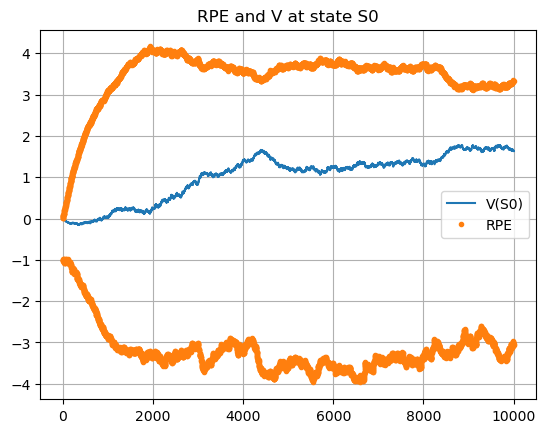

In [7]:
plt_V_RPE(0, V_t, RPE_t)

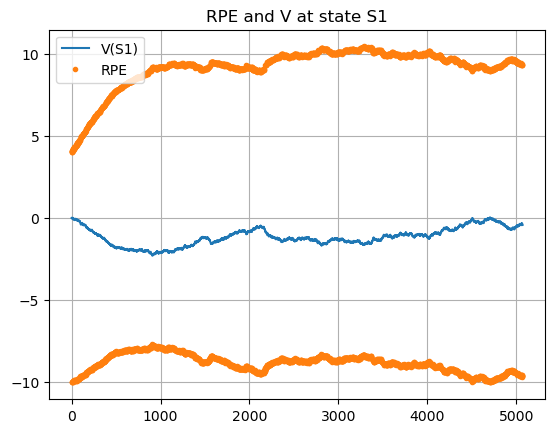

In [8]:
plt_V_RPE(1, V_t, RPE_t)

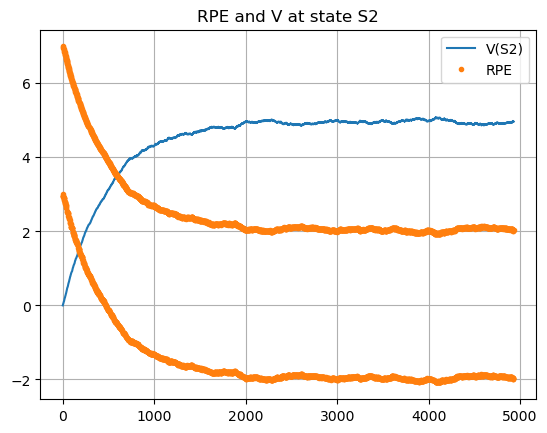

In [9]:
plt_V_RPE(2, V_t, RPE_t)

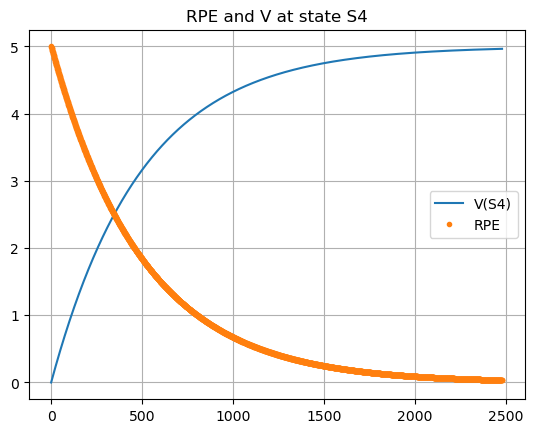

In [10]:
plt_V_RPE(4, V_t, RPE_t)

Comments:
- The graph at *state S4* is the simplest to understand: From S4, both actions lead to S7 yielding a reward r=+5. For this reason, there is no noise and both, RPE and V(S4) converge to the expected values by following a typical exponential decay. After convergence V(S4) predicts a future return of +5. When landing in S7, the agent gets the predicted r=+5 and the Reward Prediction Error RPE is 0:
$RPE = V(S7) + r - V(S4) = 0+5-5=0 $  


- The value of state *S2*, V(S2), converges to + 5.0. The RPE fluctuates between +2 (when selecting a0 and receiving r=+7 at S6) and -2 (when selecting a1 and receiving r= +3 at S5). Note that the **RPE is 0 on average**.


- There is a little dip of V(S0) during the first few hundred episodes. The reason is that the reward information takes time to "travel back" from the distal states (like S7) to the start state S0. At each iteration, this version of TD learning updates only one step back. For example, when going from S4 to S7, V(S4) is updated, but it takes another episode, moving from S1 to S4, to inform S1 about the distal reward +5 at S7. And only in a third episode, when moving from S0 to S1, some information about future rewards reaches S0.
On the other hand, when going from S0 to S1 for the first time, the agent has no knowledge of the future rewards and the RPE is negative because $r = -1$ is observed immediately. Starting from initial values V(s) = 0, we have  
$RPE = V(S1) +r - V(S0) = 0 -1 - 0 = -1$  
and  
$V(S0) \leftarrow V(S0) + \alpha*RPE$  
pushes V(S0) first to negative values. During early episodes, this drop is not compensated by the more rewarding "right" side of the treasure map: When taking a1 at S0, the immediate reward is 0 and V(S0) is (in the beginning) still 0 (or small).  It takes many iterations until the reward information reaches the early states and V(S0) starts to increase.  
A similar dip can be seen at state S1: The -10 reward initially dominates over the equally distant +4. It takes many iterations until the more distal +5 reward pushes $V(S1)$ up towards $V(S1)=-0.5$  
We conclude that an agent should not rely too early on non-converged values. It is important to keep exploring and updating the values. 


- Be careful when comparing the figures across states: Not all states are visited equally often! For example, under the random policy, state S4 is visited only half the time S1 is visited. The x-axis counts visits, not episodes.
    